# Exploratory Data Analysis (EDA)

This notebook explores the Xente transaction dataset (`data.csv`) to understand its structure, assess data quality, and identify patterns that will guide feature engineering and credit risk modeling. The variable definitions file is used as a reference to interpret the dataset but is not analyzed directly.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

# Load transaction data
df = pd.read_csv("../data/raw_data/data.csv")

df.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [8]:
df.shape


(95662, 16)

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [10]:
df.describe()


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


## Dataset Overview

The transaction dataset contains **95,662 records** and **16 features**, where each row represents a single customer transaction on the Xente platform. The dataset size is sufficiently large to support robust exploratory analysis and downstream modeling.

### Data Types

The dataset consists of a mix of categorical and numerical variables:

- **Categorical features (object type):** TransactionId, BatchId, AccountId, SubscriptionId, CustomerId, CurrencyCode, ProviderId, ProductId, ProductCategory, ChannelId, and TransactionStartTime.
- **Numerical features:**  
  - Continuous: Amount  
  - Discrete: CountryCode, Value, PricingStrategy, and FraudResult

The `TransactionStartTime` column is currently stored as an object and will require conversion to a datetime format during feature engineering.

### Missing Values

There are **no missing values** in any of the columns. All 95,662 records are complete, which simplifies preprocessing and reduces the need for imputation strategies.


In [11]:
df.isnull().sum().sort_values(ascending=False)


TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

### Missing Values Analysis

An assessment of missing values shows that **all columns contain complete data**, with no missing entries across the 95,662 transactions. This indicates high data quality and eliminates the need for missing value imputation during preprocessing.


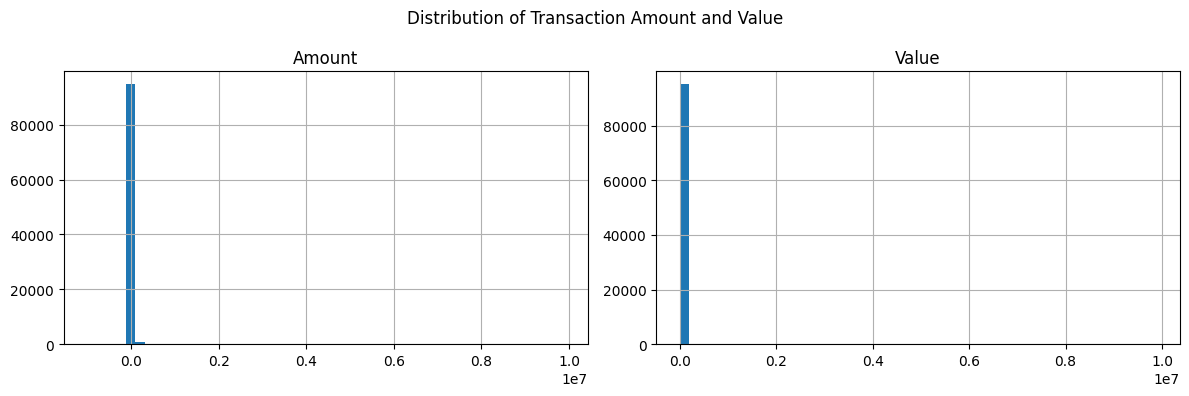

In [12]:
df[['Amount', 'Value']].hist(bins=50, figsize=(12,4))
plt.suptitle("Distribution of Transaction Amount and Value")
plt.tight_layout()
plt.show()


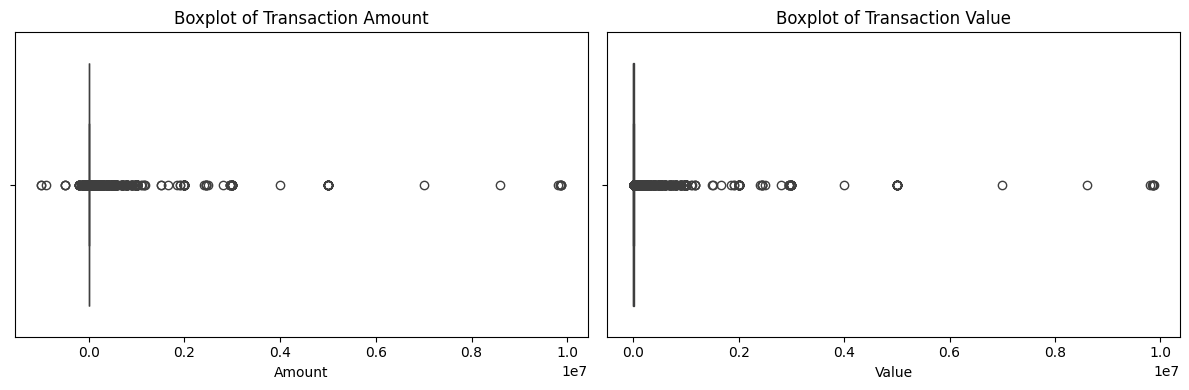

In [13]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.boxplot(x=df['Amount'])
plt.title("Boxplot of Transaction Amount")

plt.subplot(1,2,2)
sns.boxplot(x=df['Value'])
plt.title("Boxplot of Transaction Value")

plt.tight_layout()
plt.show()


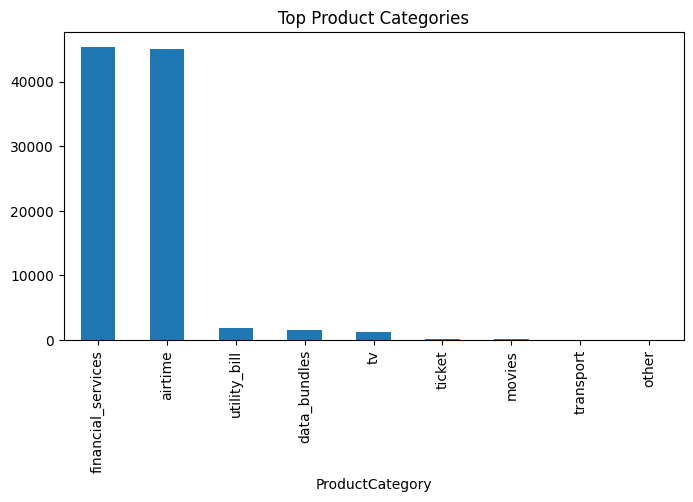

In [14]:
df['ProductCategory'].value_counts().head(10).plot(
    kind='bar',
    figsize=(8,4),
    title='Top Product Categories'
)
plt.show()


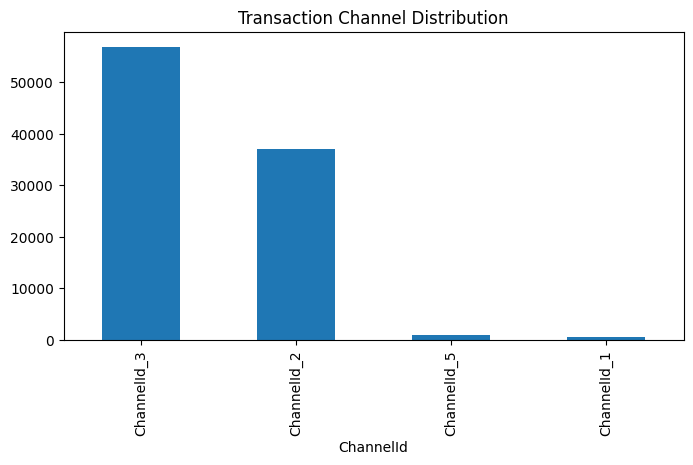

In [16]:
df['ChannelId'].value_counts().plot(
    kind='bar',
    figsize=(8,4),
    title='Transaction Channel Distribution'
)
plt.show()


In [17]:
df['CurrencyCode'].value_counts()


CurrencyCode
UGX    95662
Name: count, dtype: int64

In [18]:
df['CountryCode'].value_counts()


CountryCode
256    95662
Name: count, dtype: int64

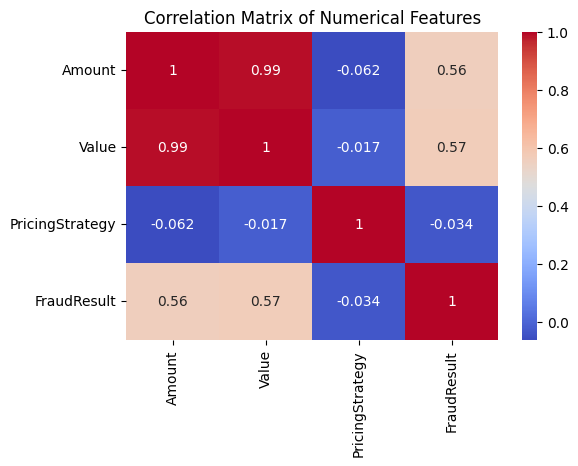

In [19]:
corr = df[['Amount', 'Value', 'PricingStrategy', 'FraudResult']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [20]:
df['FraudResult'].value_counts(normalize=True)


FraudResult
0    0.997982
1    0.002018
Name: proportion, dtype: float64

## Key EDA Insights

1. **Highly Skewed Transaction Amounts and Values**  
   The distributions of both `Amount` and `Value` are heavily right-skewed with extreme outliers. Transactions range from very small values to exceptionally large amounts, indicating heterogeneous customer behavior. This suggests the need for aggregation at the customer level and potential scaling or transformation during feature engineering.

2. **Presence of Negative Transaction Amounts**  
   The `Amount` feature contains both positive and negative values, representing debits and credits respectively. This distinction is important for understanding cash flow behavior and will be leveraged during feature engineering to derive meaningful customer-level monetary features.

3. **Single-Country and Single-Currency Dataset**  
   All transactions occur in a single country (`CountryCode = 256`) and use a single currency (`UGX`). While this simplifies modeling by removing cross-country and currency effects, it also limits the geographic generalizability of the model.

4. **Highly Imbalanced Fraud Indicator**  
   The `FraudResult` variable is extremely imbalanced, with fraudulent transactions representing approximately 0.2% of all records. This confirms that `FraudResult` is unsuitable as a proxy for credit default and reinforces the need to construct an alternative target variable based on customer behavioral patterns.

5. **Weak Linear Correlation Among Numerical Features**  
   Correlation analysis shows limited linear relationships between numerical features such as `Amount`, `Value`, and `PricingStrategy`. This indicates that non-linear interactions and customer-level behavioral aggregations are likely to be more informative for credit risk modeling.
